# The Solow Model

Imports and set magics:

In [93]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy.solvers import solve
from sympy import *
sm.init_printing()
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Solow model** 

Production function:
$$
Y_t = K_t^αH_t^σ(A_tL_t)^{(1-α-σ)}
$$

Y is output, K is physical capital, L is labor, H is human capital and A is technology. α and σ are the output elasticities of physical capital and human capital, respectively, and (1-α-σ) is the output elasticity of labor. 
Savings are divided in physical capital savings and human capital savings. They are defined as a constant fraction of the income. 
$$
S_t=(s_K+s_H)Y_t
$$

The accumulation of physical capital over time is defined as:
$$
K_{t+1} = s_KY_t + (1-δ)K_t
$$
where δ is the depreciation rate of capital, and $K_{t+1}$ and $K_t$ are the levels of physical capital in periods t+1 and t, respectively.

The accumulation of human capital over time is defined as:
$$
H_{t+1} = s_HY_t +(1-δ)H_t
$$
where δ is the depreciation rate of capital and $H_{t+1}$ and $H_t$ are the levels of human capital in periods t+1 and t, respectively.

Finally, the level of technology and labor are defined as:
$$
A_{t+1} = (1+g)A_t
$$
$$
L_{t+1} = (1+n)L_t
$$
where g is the rate of technological progress and n is the population growth. 


## Analytical solution

We begin by trying to solve the general Solow model analytically, and will expand with human capital later in the project. 

In [94]:
# Define the variables and parameters
k, L, s, delta, alpha, n, g = sm.symbols('k L s delta alpha n g')

# Define the production function
Y = k**alpha * L**(1-alpha)

# Define the savings and accumulation equations
S = s*Y
K_next = S + (1-delta)*k

# Define the labor accumulation equation
L_next = (1+n)*L

# Define the system of equations and solve for the steady state values
system = [Y - delta*k - K_next,
          S - K_next,
          L_next - L]

ss_sol = sm.solve(system, [k, L])

# Define the steady state function
k_ss = sm.lambdify((s, delta, alpha, n, g), ss_sol[0])

# Test the function with example parameters
params = (0.6, 0.05, 0.3, 0.01, 0.025)
print(k_ss(*params))

(0, 0)


Simpy solve on the Solow model was unsuccessful. This is because in the Solow model, the steady state values of k, L, and A are normally found by solving a system of nonlinear equations numerically, rather than analytically.

## Numerical solution

We begin solving the general Solow model numerically. 

In [95]:
from scipy.optimize import root

# Define the parameters
s = 0.2
delta = 0.05
alpha = 0.3
n = 0.01
g = 0.02
params = (s, delta, alpha, n, g)

# Define the production function
def production_function(k, alpha):
    return k**alpha

# Define the capital accumulation equation
def capital_accumulation(k, s, alpha, delta, n, g):
    return s * production_function(k, alpha) - delta * k - n * k + g * k

# Define the steady state function
def steady_state(k, s, alpha, delta, n, g):
    return capital_accumulation(k, s, alpha, delta, n, g) - k

# Solve for the steady state numerically
result = root(steady_state, 1, args=params)
k_ss = result.x[0]
print("Steady state value of k:", k_ss)


Steady state value of k: 0.14055033313946663


The steady state value of k is 0.14055033313946663. This means that in the long run, the economy will tend towards having a capital stock of approximately 0.1405 units per unit of labor. However this is at k0, and we wish to check for convergence at $k^*$.

Therefore we wish to check if the model converges for all starting values. We test for convergence by trying different starting values for capital and seeing if they all converge to the same steady state.

In [96]:
# Define the steady state function
def steady_state(k, s, delta, alpha, n, g):
    return s*k**alpha - (delta+n+g)*k

# Define the parameters
s = 0.2
delta = 0.05
alpha = 0.3
n = 0.01
g = 0.02

# Try different starting values for k
ks = np.linspace(1, 10, 100)
for k0 in ks:
    result = root(steady_state, k0, args=(s, delta, alpha, n, g))
    k_ss = result.x[0]
    print("Starting value of k:", k0, "Steady state value of k:", k_ss)

Starting value of k: 0.01 Steady state value of k: 0.01
Starting value of k: 0.1109090909090909 Steady state value of k: 0.1109090909090909
Starting value of k: 0.21181818181818182 Steady state value of k: 0.21181818181818182
Starting value of k: 0.31272727272727274 Steady state value of k: 0.31272727272727274
Starting value of k: 0.41363636363636364 Steady state value of k: 0.41363636363636364
Starting value of k: 0.5145454545454545 Steady state value of k: 0.5145454545454545
Starting value of k: 0.6154545454545455 Steady state value of k: 0.6154545454545455
Starting value of k: 0.7163636363636363 Steady state value of k: 0.7163636363636363
Starting value of k: 0.8172727272727273 Steady state value of k: 0.8172727272727273
Starting value of k: 0.9181818181818182 Steady state value of k: 0.9181818181818182
Starting value of k: 1.019090909090909 Steady state value of k: 1.019090909090909
Starting value of k: 1.1199999999999999 Steady state value of k: 1.1199999999999999
Starting value o

/var/folders/9j/v95rb3md0v72jhphm0mh6thr0000gn/T/ipykernel_19861/2045097417.py:3: RuntimeWarning: invalid value encountered in power
  return s*k**alpha - (delta+n+g)*k


Here we see that the model converges towards the steady state value 6.607614053371311. 

/var/folders/9j/v95rb3md0v72jhphm0mh6thr0000gn/T/ipykernel_19861/2364060277.py:3: RuntimeWarning: invalid value encountered in power
  return ((s * k**alpha) + ((1 - delta) * k)) / (1 + n + g)


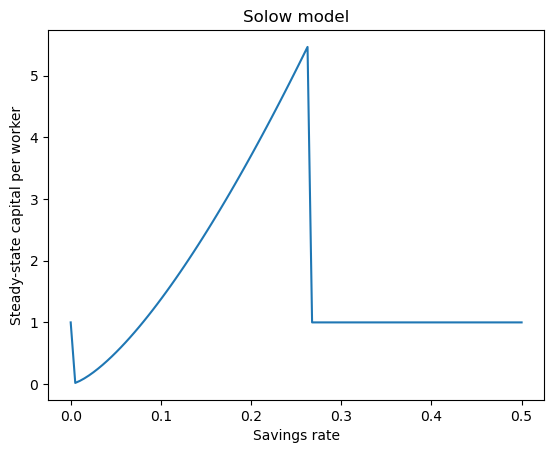

In [97]:

# Define the Solow model function
def solow_model(k, s, delta, alpha, n, g):
    return ((s * k**alpha) + ((1 - delta) * k)) / (1 + n + g)

# Define the function to find the steady-state solution
def steady_state(k, s, delta, alpha, n, g):
    return solow_model(k, s, delta, alpha, n, g) - k

# Define the parameters
delta = 0.05
alpha = 0.3
n = 0.01
g = 0.02

# Create an array of savings rates to test
savings_rates = np.linspace(0, 0.5, 100)

# Create an empty array to store the steady-state solutions
steady_state_values = np.empty_like(savings_rates)

# Find the steady-state solution for each savings rate
for i, s in enumerate(savings_rates):
    result = root(steady_state, 1, args=(s, delta, alpha, n, g))
    steady_state_values[i] = result.x[0]

# Create the graph
plt.plot(savings_rates, steady_state_values)
plt.xlabel('Savings rate')
plt.ylabel('Steady-state capital per worker')
plt.title('Solow model')
plt.show()

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 